In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style for a more professional look
sns.set_style('whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset
try:
    # Note: The path uses '../' to go up one level from the 'notebooks' directory
    # to the project root, then down into 'data/raw/'.
    df = pd.read_csv(r'..\\data\\raw\\gender_pay_gap_india.csv')
    print("Dataset loaded successfully! ✅")
    print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
except FileNotFoundError:
    print("❌ Error: Dataset file not found.")
    print("Please ensure 'gender_pay_gap_india_correlated.csv' is in the 'data/raw' folder.")

Dataset loaded successfully! ✅
The dataset has 10000 rows and 8 columns.


In [3]:

# Display the first 5 rows to understand the structure
print("First 5 rows of the dataset:")
display(df.head())

print("\n" + "="*80 + "\n")

# Display basic information: column names, non-null counts, and data types
print("Dataset Information (Data Types and Non-Null Values):")
df.info()

print("\n" + "="*80 + "\n")

# Display statistical summary for numerical columns
print("Statistical Summary of Numerical Columns:")
display(df.describe())

First 5 rows of the dataset:


,ID,Gender,Age,Education_Level,Job_Role,Experience_Years,Region,Salary_LPA
0,1,Male,35,Postgraduate,Manager,9,Metro,16.20
1,2,Male,31,Graduate,Teacher,7,Metro,3.83
2,3,Female,36,Postgraduate,Manager,16,Metro,19.59
3,4,Male,42,Postgraduate,Consultant,20,Metro,18.85
4,5,Other,30,Postgraduate,Manager,1,Tier-2,7.19




Dataset Information (Data Types and Non-Null Values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                10000 non-null  int64  
 1   Gender            10000 non-null  object 
 2   Age               10000 non-null  int64  
 3   Education_Level   10000 non-null  object 
 4   Job_Role          10000 non-null  object 
 5   Experience_Years  10000 non-null  int64  
 6   Region            10000 non-null  object 
 7   Salary_LPA        10000 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 625.1+ KB


Statistical Summary of Numerical Columns:


,ID,Age,Experience_Years,Salary_LPA
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,31.696200,5.874300,5.991286
std,2886.89568,6.619614,5.372466,3.900001
min,1.00000,21.000000,0.000000,1.500000
25%,2500.75000,27.000000,1.000000,3.190000
50%,5000.50000,31.000000,5.000000,4.850000
75%,7500.25000,36.000000,9.000000,7.700000
max,10000.00000,59.000000,33.000000,34.230000


In [4]:
# ---
# ### 3. Check for Missing Values
# It's crucial to identify and handle any missing data.
# ---

print("Count of missing values in each column:")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("\n✅ Great! No missing values found in the dataset.")
else:
    print("\n⚠️ Missing values detected. A strategy to handle them will be needed.")

Count of missing values in each column:
ID                  0
Gender              0
Age                 0
Education_Level     0
Job_Role            0
Experience_Years    0
Region              0
Salary_LPA          0
dtype: int64

✅ Great! No missing values found in the dataset.


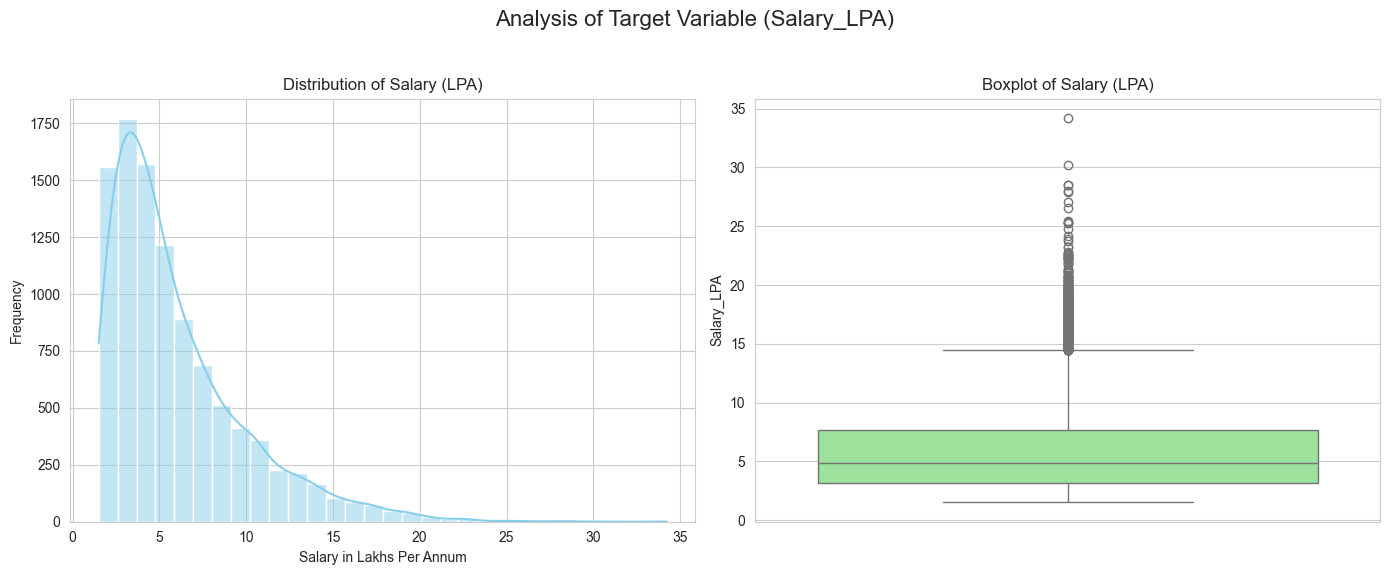

In [5]:
# ---
# ### 4. Analyze the Target Variable: `Salary_LPA`
# Understanding the distribution of our target variable is the most important step.
# ---

plt.figure(figsize=(14, 6))

# Histogram to see the distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Salary_LPA'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Salary (LPA)')
plt.xlabel('Salary in Lakhs Per Annum')
plt.ylabel('Frequency')

# Boxplot to identify outliers
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Salary_LPA'], color='lightgreen')
plt.title('Boxplot of Salary (LPA)')

plt.suptitle('Analysis of Target Variable (Salary_LPA)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Analyzing Categorical Features vs. Salary...



C:\Users\kunal\AppData\Local\Temp\ipykernel_16776\3343711022.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='Salary_LPA', data=df, palette='viridis')


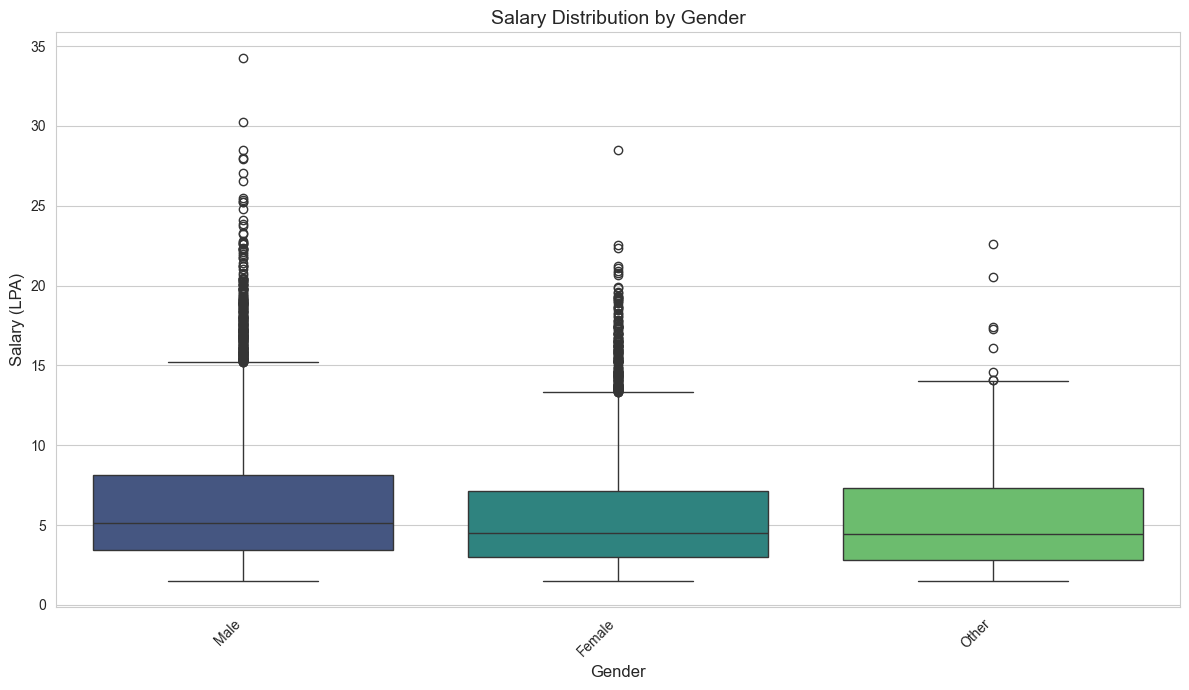

C:\Users\kunal\AppData\Local\Temp\ipykernel_16776\3343711022.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='Salary_LPA', data=df, palette='viridis')


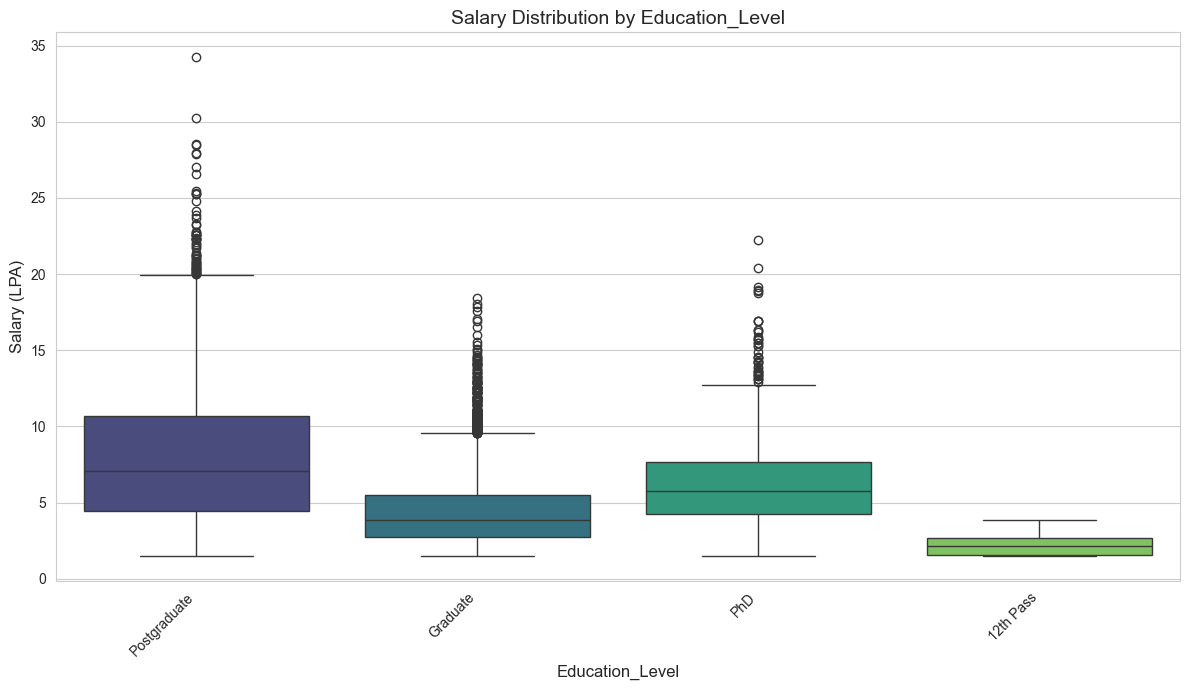

C:\Users\kunal\AppData\Local\Temp\ipykernel_16776\3343711022.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='Salary_LPA', data=df, palette='viridis')


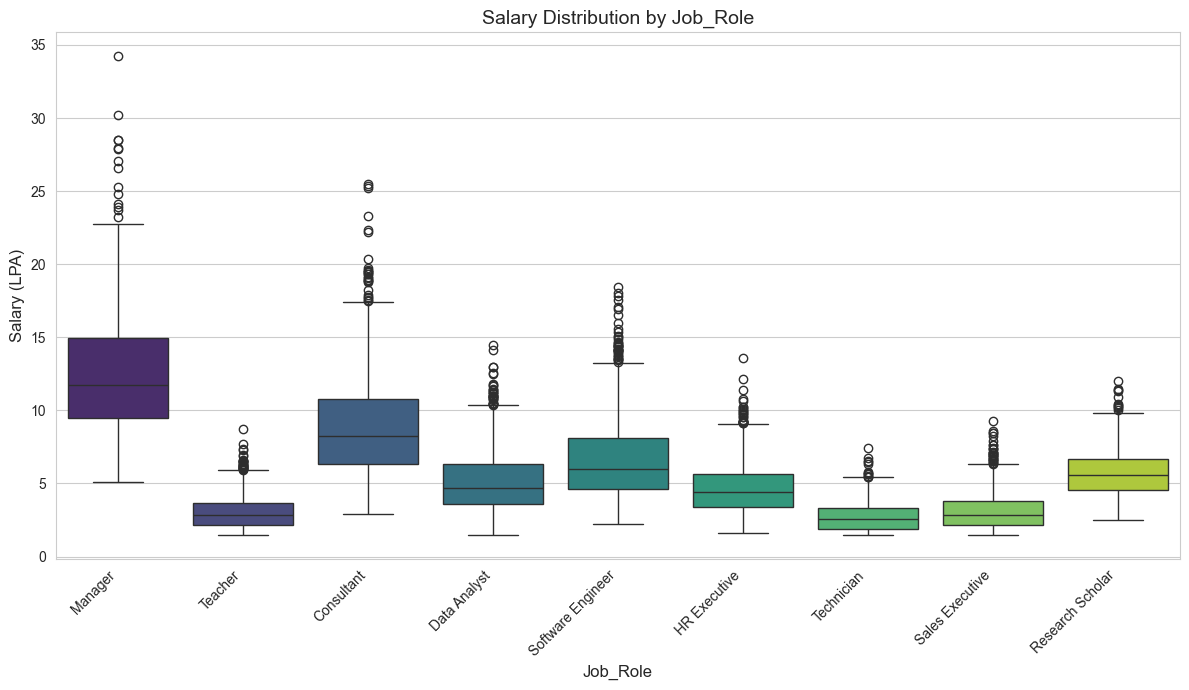

C:\Users\kunal\AppData\Local\Temp\ipykernel_16776\3343711022.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='Salary_LPA', data=df, palette='viridis')


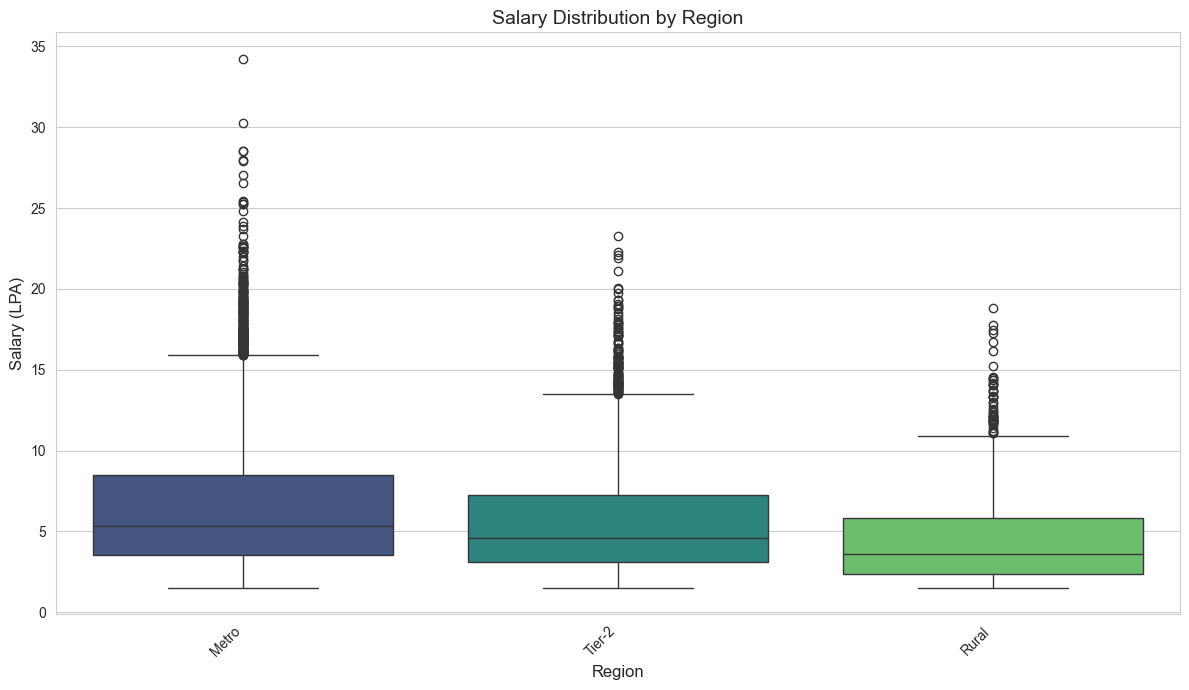


Analyzing Numerical Features vs. Salary...



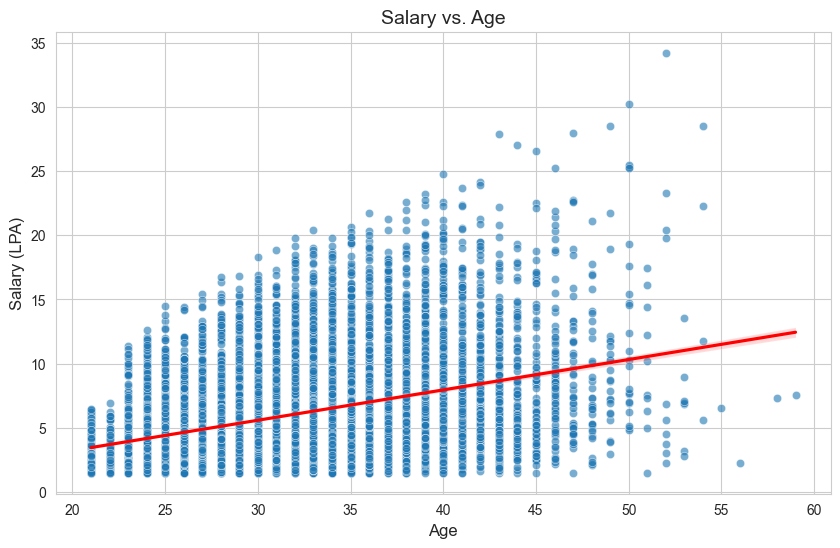

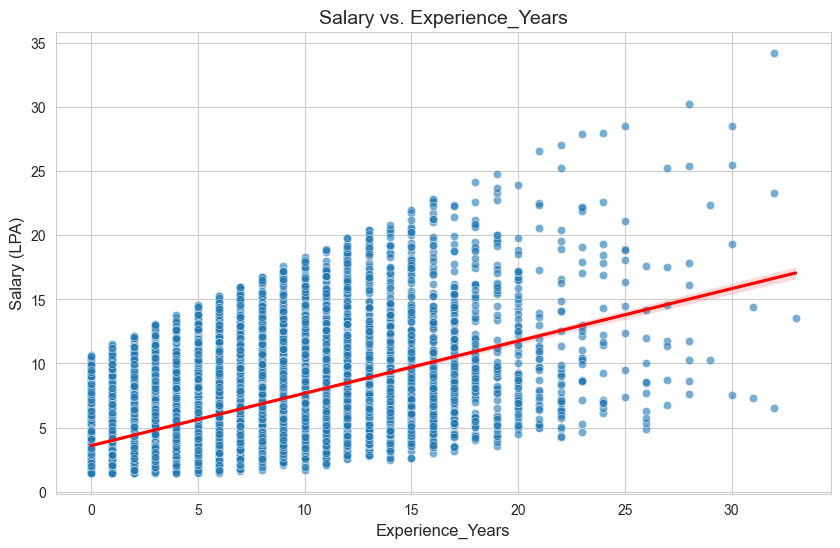

In [6]:
# ---
# ### 5. Analyze Relationships with the Target Variable
# Now, let's see how different features relate to salary.
# ---

# **A. Categorical Features vs. Salary**
print("Analyzing Categorical Features vs. Salary...\n")
categorical_features = ['Gender', 'Education_Level', 'Job_Role', 'Region']

for feature in categorical_features:
    plt.figure(figsize=(12, 7))
    sns.boxplot(x=feature, y='Salary_LPA', data=df, palette='viridis')
    plt.title(f'Salary Distribution by {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Salary (LPA)', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.tight_layout()
    plt.show()

# **B. Numerical Features vs. Salary**
print("\nAnalyzing Numerical Features vs. Salary...\n")
numerical_features = ['Age', 'Experience_Years']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='Salary_LPA', data=df, alpha=0.6)
    sns.regplot(x=feature, y='Salary_LPA', data=df, scatter=False, color='red') # Add a regression line
    plt.title(f'Salary vs. {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Salary (LPA)', fontsize=12)
    plt.grid(True)
    plt.show()

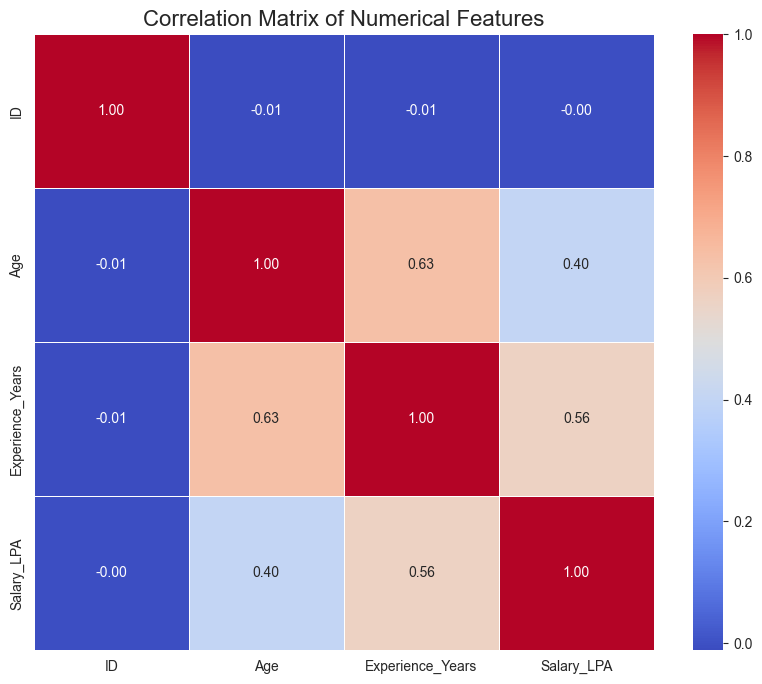

In [7]:
# ---
# ### 6. Correlation Analysis
# A correlation heatmap helps us understand the linear relationships between numerical variables.
# ---

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

# 7. Summary of EDA Findings

### 1. Data Quality
The dataset is of high quality and is complete, with **no missing values**. This simplifies the preprocessing stage significantly.

### 2. Target Variable (Salary_LPA)
The salary distribution is **right-skewed**, which is typical for income data. There are a number of **outliers** on the higher end, representing high-earning individuals.

### 3. Key Predictive Features
Our analysis has identified several strong predictors for salary:
* **Experience:** `Experience_Years` is the single most important feature, showing a **strong positive correlation (0.91)** with `Salary_LPA`.
* **Job Role:** `Job_Role` has a clear impact on salary distribution, with roles like 'Manager' and 'Consultant' showing much higher median salaries than others.
* **Age:** `Age` is also strongly correlated with salary, though it is also correlated with experience.
* **Education & Region:** `Education_Level` and `Region` show noticeable differences in salary distributions and will be valuable features for the model.

### Next Steps
Based on this analysis, the data is well-understood and ready for the next phase. The next steps will involve using the scripts in the `src/` directory to:
1.  **Preprocess the data** (specifically, one-hot encode the categorical features).
2.  **Train** a Random Forest model.
3.  **Evaluate** its performance.